<a href="https://colab.research.google.com/github/Llannelongue/teaching_Cambridge/blob/main/Create_a_resampling_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal here is to have some generalisable code that we could, if we wanted to, use in a variety of projects using parametric and non-parametric sampling. 

_Contributors (listed alphabetically): Aidan Brocklebank, Ilja Caikovskis, Jamie Cao, Isaac Dixon, Olivia Hayward, Matthew Keenan, Nav Leelarathna, Jano Letovanec, Kwing Hei Li, Amaar Patel, Gabor Pituk, Aravind Prabhakaran, Keshav Sivakumar, Andru Stefanescu, Peter Zhang_

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
class sampling_parent():
  def __init__(self):
    pass

  def set_statistic(self, stat_fun):
    self.stat_fun = stat_fun

  def generate_sample(self, list_kwargs):
    '''
    list_kwargs: list(dict(param:value))
    '''
    return [self.distribution(**kwargs) for kwargs in list_kwargs]

  def simulate_statistics(self, n_samples, list_kwargs):
    return [self.stat_fun(*self.generate_sample(list_kwargs)) for _ in range(n_samples)]

  def CI(self, sample, low, high):
    return np.quantile(sample, (low,high))

  def simulate_and_CI(self, n_samples, list_kwargs, low, high, doPlot=True):
    sample_stats = self.simulate_statistics(
        n_samples=n_samples,
        list_kwargs=list_kwargs
    )

    if doPlot:
      sns.distplot(sample_stats)

    CI = self.CI(sample_stats, low=low, high=high)

    return CI

In [ ]:
class parametric_sampling(sampling_parent):
  def __init__(self, distribution):
    super().__init__()
    self.distribution = distribution
  

In [ ]:
class nonparametric_sampling(sampling_parent):
  def __init__(self, data):
    super().__init__()
    self.data = data

  def distribution(self):
    return np.random.choice(self.data, size=len(self.data))

# Question 1

In [ ]:
np.random.seed(666)

# data
n = 50
x = np.random.normal(loc=2.3, scale = 0.6, size = n)

# MLE
MLE_sigma = np.std(x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([0.38315762, 0.5721008 ])

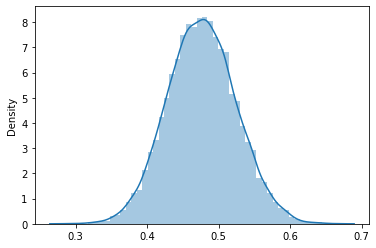

In [ ]:
def Q1_b(doPlot=True):
  np.random.seed(42)
  
  sampler = parametric_sampling(distribution=np.random.normal)

  sampler.set_statistic(lambda x:np.std(x))

  CI = sampler.simulate_and_CI(
      n_samples=int(1e4), 
      list_kwargs = [
                    dict(loc=np.mean(x), scale=MLE_sigma, size=len(x))
      ],
      low = 0.025,
      high = 0.975,
      doPlot=doPlot
  )

  return CI

Q1_b()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([0.3991721 , 0.55261495])

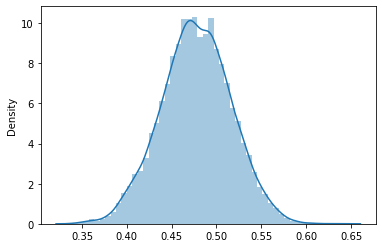

In [ ]:
def Q1_c(doPlot=True):
  np.random.seed(42)
  
  sampler = nonparametric_sampling(data=x)

  sampler.set_statistic(lambda x:np.std(x))

  CI = sampler.simulate_and_CI(
      n_samples=int(1e4), 
      list_kwargs = [dict()],
      low = 0.025,
      high = 0.975,
      doPlot=doPlot
  )

  return CI

Q1_c()

# Question 2

In [ ]:
# data

x = [3,1,5]
y = [2,3]

z = x+y

In [ ]:
# Estimate parameters
MLE_x = np.mean(x)
MLE_y = np.mean(y)

MLE_z = np.mean(z)

print(MLE_x,MLE_y,MLE_z)

3.0 2.5 2.8


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[-3.33333333  2.5       ]


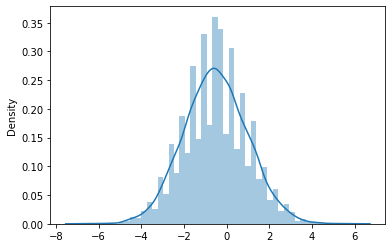

In [ ]:
def Q2_a(doPlot=True):
  np.random.seed(42)
  
  sampler = parametric_sampling(
      distribution = np.random.poisson,
  )

  sampler.set_statistic(lambda x,y:np.mean(y)-np.mean(x))

  CI = sampler.simulate_and_CI(
      n_samples=int(1e4), 
      list_kwargs=[
                   dict(lam=MLE_x,size=len(x)),
                   dict(lam=MLE_y,size=len(y))
      ], 
      low=0.025, 
      high=0.975, 
      doPlot=doPlot
  )

  return CI 

print(Q2_a())

In [ ]:
# Sanity checks

def code_lectures_Q2a():
  np.random.seed(42)

  x = [3,1,5]
  y = [2,3]

  def t(x,y): 
    return np.mean(y) - np.mean(x)
  def rxy():
    return (np.random.poisson(np.mean(x), size=len(x)), np.random.poisson(np.mean(y), size=len(y)))

  t_ = np.array([t(*rxy()) for _ in range(10000)])
  lo,hi = np.quantile(t_, [.025,.975])

  return(lo,hi)

print(code_lectures_Q2a())
print(Q2_a(doPlot=False))

assert (abs(np.array(code_lectures_Q2a() - np.array(Q2_a(doPlot=False)))) < 1e-5).all()

(-3.3333333333333335, 2.5)
[-3.33333333  2.5       ]
